In [1]:
from keras.layers import Convolution2D ,MaxPooling2D,Flatten
from keras.layers.core import Dense, Dropout, Activation
from sklearn.cross_validation import train_test_split
from keras.callbacks import History,Callback
from sklearn.metrics import classification_report
from sklearn.cross_validation import StratifiedKFold ,cross_val_score
from keras.models import model_from_config
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.regularizers import l2
from keras import backend as K
import theano.tensor as T
import theano
import keras
import pickle


Using Theano backend.
Using gpu device 0: GeForce 940M (CNMeM is disabled, CuDNN not available)
C:\Users\Back_jud\Anaconda2\lib\site-packages\theano\tensor\signal\downsample.py:6: UserWarning:

downsample module has been moved to the theano.tensor.signal.pool module.



In [2]:
# binary category to label 
def cat2lab (x):
    '''only for binary category'''
    return np.array([0 if s[0] else 1 for s in x])

### Loading data from pickle and formatting

In [3]:
a = open('d://labels_new.p')
b = open('d://images_new.p')
labels = np.array(pickle.load(a))
imgs = np.array(pickle.load(b))
imgsr = imgs /255
labels = np_utils.to_categorical(labels,nb_classes=2)

In [4]:
orimgs =[]
for img in imgsr:
    orimgs.append(np.reshape(img,(50,50))) 
orimgs = np.array(orimgs)

### Split data

In [5]:
x_tr,x_te,y_tr,y_te = train_test_split(orimgs,labels,test_size= 0.2,random_state= 123)

In [6]:
x_tr1,x_te1,y_tr1,y_te1 = train_test_split(imgsr,labels,test_size= 0.2,random_state= 123)

## Trial1.Simple neuron

### need to add regularizer  L2 , activity L2 for further use


In [7]:
model1 = Sequential()
model1.add(Dense(2500, input_dim=2500,init ='uniform'))
model1.add(Activation('relu'))
model1.add(Dense(2, activation="softmax"))
model1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01,decay= 1e-6,momentum=0.9,nesterov=True))

Train on 90 samples, validate on 23 samples
Epoch 1/300
90/90 [==============================] - 0s - loss: 0.7063 - acc: 0.5667 - val_loss: 0.8684 - val_acc: 0.3043
Epoch 2/300
90/90 [==============================] - 0s - loss: 0.6809 - acc: 0.5111 - val_loss: 1.1523 - val_acc: 0.3913
Epoch 3/300
90/90 [==============================] - 0s - loss: 0.5925 - acc: 0.6778 - val_loss: 0.7327 - val_acc: 0.5217
Epoch 4/300
90/90 [==============================] - 0s - loss: 0.4123 - acc: 0.8556 - val_loss: 0.7824 - val_acc: 0.5217
Epoch 5/300
90/90 [==============================] - 0s - loss: 0.3356 - acc: 0.8778 - val_loss: 0.6578 - val_acc: 0.6522
Epoch 6/300
90/90 [==============================] - 0s - loss: 0.2348 - acc: 0.9222 - val_loss: 0.6281 - val_acc: 0.6087
Epoch 7/300
90/90 [==============================] - 0s - loss: 0.1831 - acc: 0.9667 - val_loss: 0.6090 - val_acc: 0.6087
Epoch 8/300
90/90 [==============================] - 0s - loss: 0.1510 - acc: 0.9778 - val_loss: 0.613

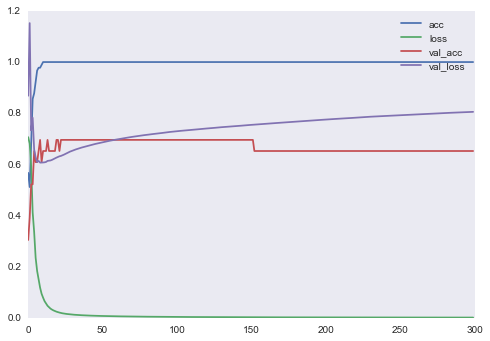

In [8]:
%time hist1 = model1.fit(x_tr1, np.array(y_tr1), nb_epoch=300,validation_split=0.2 ,batch_size=50,show_accuracy=True,verbose=1)
plt.plot(hist1.history['acc'],label='acc')
plt.plot(hist1.history['loss'],label='loss')
plt.plot(hist1.history['val_acc'],label='val_acc')
plt.plot(hist1.history['val_loss'],label='val_loss')
plt.grid('off')
plt.legend()

In [9]:
model1.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 2500)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Dense (dense)                 (None, 2500)                  6252500             
Activation (activation)       (None, 2500)                  0                   
Dense (dense)                 (None, 2)                     5002                
--------------------------------------------------------------------------------
Total params: 6257502
--------------------------------------------------------------------------------


In [10]:
model1.evaluate(x_te1,y_te1,batch_size=50,show_accuracy=True)

29/29 [==============================] - 0s


[0.94238817691802979, 0.72413793103448276]

In [11]:
y_pred1 = model1.predict_classes(x_te1,20)
y_pred1

29/29 [==============================] - 0s     


array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1], dtype=int64)

In [12]:
y_ten1 = cat2lab(y_te1)
y_ten1

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1])

In [13]:
print(classification_report(y_ten1,y_pred1))

             precision    recall  f1-score   support

          0       0.62      0.73      0.67        11
          1       0.81      0.72      0.76        18

avg / total       0.74      0.72      0.73        29



In [14]:
for i in model1.get_weights():
    print(np.shape(i))

(2500L, 2500L)
(2500L,)
(2500L, 2L)
(2L,)


## Trial2. CNN

In [15]:
#reshape to shape (1,50,50) for CNN
imgs2d= []
for img in imgsr:
    imgs2d.append(np.reshape(img,(1,50,50)))
imgs2d = np.array(imgs2d)

In [16]:
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(imgs2d,labels,test_size= 0.2,random_state= 123)

### what about cross validation to CNN

In [17]:
model2 = Sequential()
model2.add(Convolution2D(10,10, 10, border_mode='same', input_shape=(1, 50, 50)))
model2.add(Activation('relu'))
# model2.add(Convolution2D(50, 5, 5,init='uniform'))
# model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Convolution2D(10, 10, 10,init='uniform' ,border_mode='same'))
model2.add(Activation('relu'))
# model2.add(Convolution2D(100, 5, 5,init='uniform'))
# model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(1250,init='uniform'))
model2.add(Activation('relu'))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01,decay=1e-6,
                                                              momentum=0.6,
                                                              nesterov=True))

In [18]:
%time hist2 = model2.fit(x_tr2, y_tr2, nb_epoch=300 , batch_size=50 ,validation_split=0.2, show_accuracy=True ,shuffle=True)

Train on 90 samples, validate on 23 samples
Epoch 1/300
90/90 [==============================] - 0s - loss: 1.5408 - acc: 0.4000 - val_loss: 0.6805 - val_acc: 0.6087
Epoch 2/300
90/90 [==============================] - 0s - loss: 1.1057 - acc: 0.4556 - val_loss: 0.6905 - val_acc: 0.6522
Epoch 3/300
90/90 [==============================] - 0s - loss: 0.6994 - acc: 0.4444 - val_loss: 0.6921 - val_acc: 0.5217
Epoch 4/300
90/90 [==============================] - 0s - loss: 0.6927 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.5217
Epoch 5/300
90/90 [==============================] - 0s - loss: 0.6877 - acc: 0.5556 - val_loss: 0.6934 - val_acc: 0.4783
Epoch 6/300
90/90 [==============================] - 0s - loss: 0.6927 - acc: 0.5667 - val_loss: 0.6948 - val_acc: 0.4348
Epoch 7/300
90/90 [==============================] - 0s - loss: 0.6863 - acc: 0.6000 - val_loss: 0.6955 - val_acc: 0.4348
Epoch 8/300
90/90 [==============================] - 0s - loss: 0.6861 - acc: 0.6111 - val_loss: 0.695

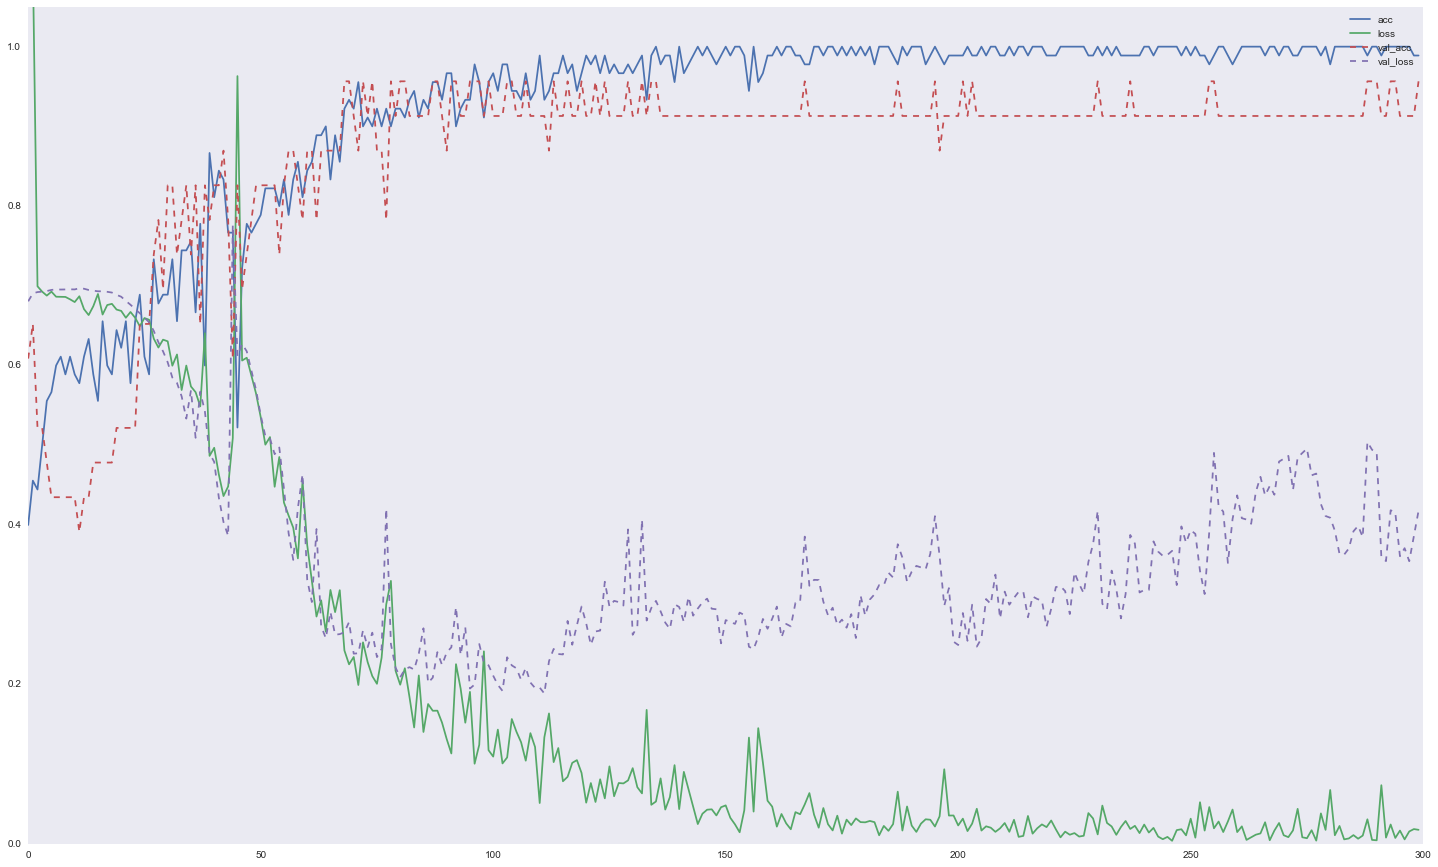

In [19]:
plt.figure(figsize=(25,15))
plt.plot(hist2.history['acc'],label='acc')
plt.plot(hist2.history['loss'],label='loss')
plt.plot(hist2.history['val_acc'],'--',label='val_acc')
plt.plot(hist2.history['val_loss'],'--',label='val_loss')
plt.legend()
plt.ylim(0,max(hist2.history['acc'])+0.05)
plt.grid('off')

In [20]:
model2.evaluate(np.array(x_te2),y_te2,batch_size=50,show_accuracy=True,verbose=1)

29/29 [==============================] - 0s


[0.54648280143737793, 0.89655172413793105]

In [21]:
model2.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 1, 50, 50)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Convolution2D (convolution2d) (None, 10, 50, 50)            1010                
Activation (activation)       (None, 10, 50, 50)            0                   
MaxPooling2D (maxpooling2d)   (None, 10, 25, 25)            0                   
Dropout (dropout)             (None, 10, 25, 25)            0                   
Convolution2D (convolution2d) (None, 10, 25, 25)            10010               
Activation (activation)       (None, 10, 25, 25)            0                   
MaxPooling2D (maxpooling2d)   (None, 10, 12, 12)            0                   
Dropout (dropout)             (None, 10, 12, 12)            0         

In [22]:
m2_wegh =  model2.get_weights()

In [23]:
def plot_wegh (model):
    '''
    Plot weights of convolution layer
    only for first layer
    
    #Args
    model : fitted model
    '''
    wegh_arr = model.get_weights()
    num = len(wegh_arr[0])
    if type(np.sqrt(num)) is int:
        col = np.sqrt(num)
        row = np.sqrt(num) 
    else:
        col = int(num/2)
        row = int(num/col)
        
    fig ,axes = plt.subplots(row,col, subplot_kw={'xticks': [], 'yticks': []})
    plt.subplots_adjust(hspace=0.02,wspace = 0.05)
    
    for i, ax in zip(xrange(num),axes.flat):
        
        ax.imshow(wegh_arr[0][i][0])
        ax.grid('off')
    plt.show()

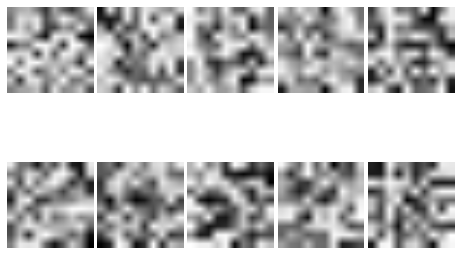

In [24]:
plot_wegh(model2)

In [25]:
m2_wegh = model2.get_weights()
for a in m2_wegh:
    print(np.shape(a))

(10L, 1L, 10L, 10L)
(10L,)
(10L, 10L, 10L, 10L)
(10L,)
(1440L, 1250L)
(1250L,)
(1250L, 2L)
(2L,)


In [26]:
s = 0
for a in m2_wegh[0]:
    s +=a[0]
    print(s)

[[ 0.04185396 -0.01925881 -0.03462337  0.06233661  0.18351071 -0.0105659
   0.1046102   0.1811776   0.06886853 -0.13570732]
 [ 0.08646858 -0.12451239 -0.07455404 -0.14532889  0.14616272  0.02798516
  -0.18404028 -0.0607659   0.07588059  0.04442141]
 [ 0.06719602 -0.10220987  0.02024777 -0.15111621  0.16676794  0.16404884
   0.01042528  0.07144424 -0.15446714  0.11962256]
 [-0.2063223  -0.14667982 -0.07958797  0.13106559  0.24750791 -0.16927479
  -0.11067093 -0.13693337  0.24023052  0.26554349]
 [ 0.2217558   0.0620415   0.06949033 -0.20778389 -0.19225532 -0.06515209
   0.19430786 -0.22880305 -0.1598655   0.13971774]
 [-0.09681705 -0.10490044 -0.1133453   0.19777326 -0.14961039  0.13108781
  -0.16932361 -0.13010059  0.06603144 -0.00959289]
 [-0.22665425  0.10652092 -0.18477397 -0.20803183 -0.05789813 -0.02187913
  -0.04891073  0.00477407  0.21089482 -0.19625543]
 [ 0.0796387  -0.22148076 -0.11206826  0.14960276  0.03977557 -0.10350049
   0.06331265 -0.16887933 -0.13171941  0.15357326]
 

In [27]:
y_pred2 = model2.predict_classes(np.array(x_te2))
y_pred2

29/29 [==============================] - 0s


array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
y_ten2 = cat2lab(y_te2)
y_ten2

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1])

In [29]:
print(classification_report(y_ten2,y_pred2))

             precision    recall  f1-score   support

          0       1.00      0.73      0.84        11
          1       0.86      1.00      0.92        18

avg / total       0.91      0.90      0.89        29



### (Temp)Cross val with CNN currently not working :  cant initialize weight on interation

In [30]:
cv= StratifiedKFold(cat2lab(labels),n_folds=10,shuffle=True)

In [59]:
model5 = Sequential()
model5.add(Convolution2D(10,10, 10, border_mode='same', input_shape=(1, 50, 50)))
model5.add(Activation('relu'))
# model5.add(Convolution2D(20, 10, 10,init='uniform'))
# model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))



model5.add(Convolution2D(15, 10, 10,init='uniform' ,border_mode='same'))
model5.add(Activation('relu'))
# model2.add(Convolution2D(100, 5, 5,init='uniform'))
# model2.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(1250,init='uniform'))
model5.add(Activation('relu'))
model5.add(Dense(2,activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01,decay=1e-6,
                                                              momentum=0.6,
                                                              nesterov=True))

In [60]:
# score = []
# weight = []

# for layer in model5.layers:
#     weight.append(layer.get_weights())

# for i ,(cv_tr,cv_te) in enumerate(cv):
#     for j,(layer,weight) in enumerate(zip(model5.layers,weight)):
#         layer.set_weights(None)
        

%time hist5 = model5.fit(x_tr2, y_tr2, nb_epoch=300 ,validation_split=0.2, batch_size = 50 ,show_accuracy=True ,shuffle=True)
evals = model5.evaluate(x_te2,y_te2, batch_size= 50 ,show_accuracy=True)
print(i, 'test loss : ', evals[0]  , 'test acc : ' ,evals[1])


Train on 90 samples, validate on 23 samples
Epoch 1/300
90/90 [==============================] - 0s - loss: 2.8926 - acc: 0.5333 - val_loss: 0.6687 - val_acc: 0.6522
Epoch 2/300
90/90 [==============================] - 0s - loss: 0.7372 - acc: 0.4667 - val_loss: 0.6835 - val_acc: 0.6522
Epoch 3/300
90/90 [==============================] - 0s - loss: 0.6894 - acc: 0.4667 - val_loss: 0.6858 - val_acc: 0.5217
Epoch 4/300
90/90 [==============================] - 0s - loss: 0.6875 - acc: 0.5333 - val_loss: 0.6870 - val_acc: 0.4783
Epoch 5/300
90/90 [==============================] - 0s - loss: 0.6697 - acc: 0.5778 - val_loss: 0.6859 - val_acc: 0.5652
Epoch 6/300
90/90 [==============================] - 0s - loss: 0.6768 - acc: 0.5667 - val_loss: 0.6812 - val_acc: 0.5652
Epoch 7/300
90/90 [==============================] - 0s - loss: 0.6585 - acc: 0.5667 - val_loss: 0.6773 - val_acc: 0.5652
Epoch 8/300
90/90 [==============================] - 0s - loss: 0.6372 - acc: 0.6111 - val_loss: 0.667

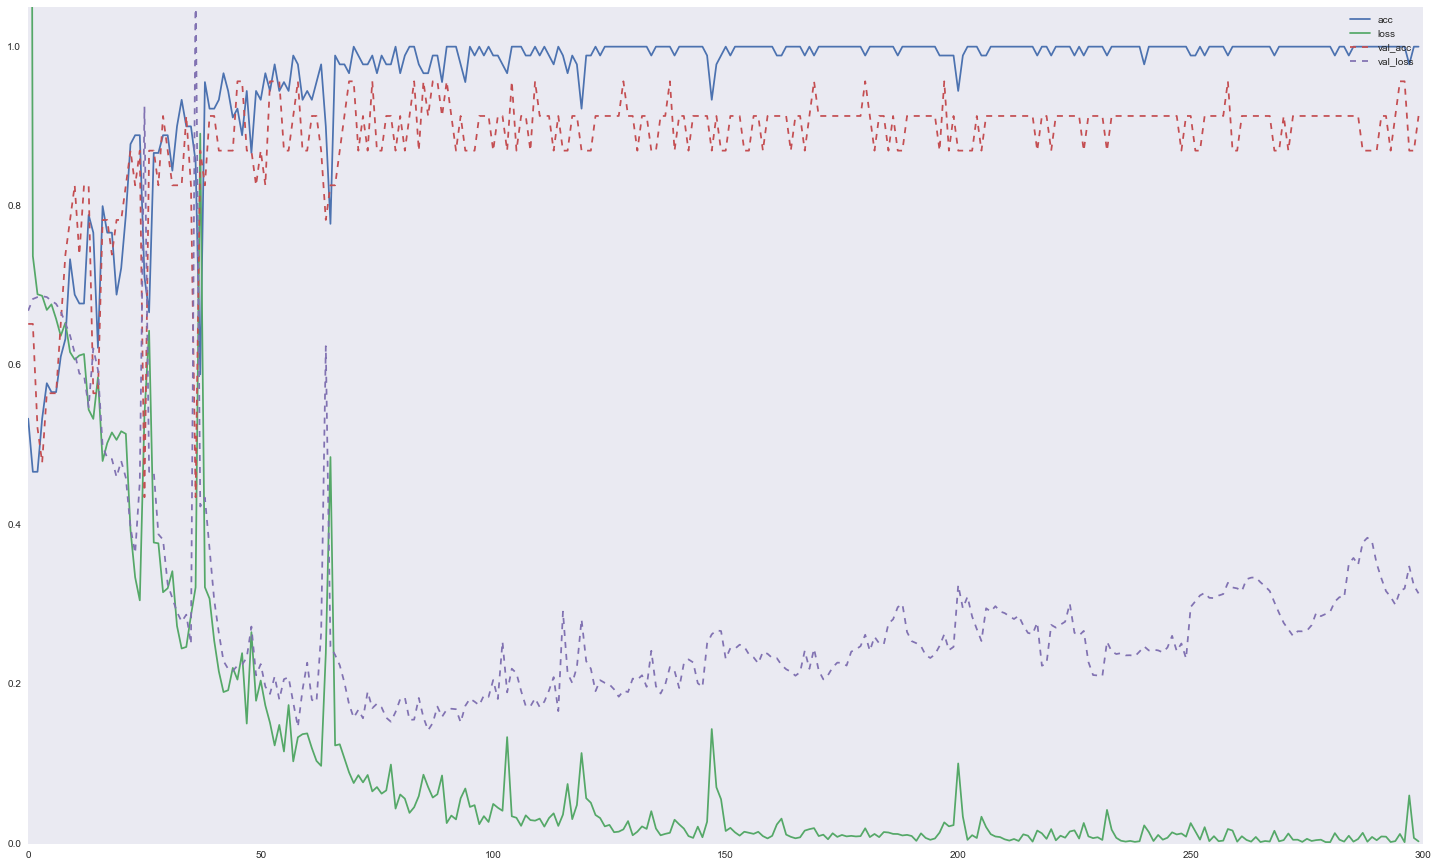

In [61]:
plt.figure(figsize=(25,15))
plt.plot(hist5.history['acc'],label='acc')
plt.plot(hist5.history['loss'],label='loss')
plt.plot(hist5.history['val_acc'],'--',label='val_acc')
plt.plot(hist5.history['val_loss'],'--',label='val_loss')
plt.legend()
plt.ylim(0,max(hist5.history['acc'])+0.05)
plt.grid('off')


## SVM

### sample수 부족??? sample 수 늘리니 결과 향상

In [34]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [35]:
cv = StratifiedKFold(cat2lab(labels),n_folds=10,shuffle=True)

In [36]:
params = {'C' : [1e1, 1e2, 1e3,1e4,1e5],
           'gamma' : [0.0001,0.0005,0.001,0.005,0.01]}

In [37]:
clf_grid = GridSearchCV(SVC(kernel='rbf'),params,cv=cv)

In [38]:
y_trn4 = cat2lab(y_tr1)

model4 = clf_grid.fit(imgsr,cat2lab(labels))

In [39]:
model4.best_score_ ,model4.best_params_

(0.84507042253521125, {'C': 10.0, 'gamma': 0.005})

In [40]:
#demo of GridSearchCV method
svc_rslt = []
for x,y in cv: 
    clf = SVC(kernel='rbf',C=10.0,gamma = 0.005,)
    clf.fit(imgsr[x],cat2lab(labels)[x])
    svc_rslt.append(clf.score(imgsr[y], cat2lab(labels)[y]))
svc_rslt = np.array(svc_rslt)
svc_rslt

array([ 0.53333333,  0.93333333,  0.86666667,  0.86666667,  0.86666667,
        0.78571429,  0.92857143,  0.84615385,  0.84615385,  1.        ])

In [41]:
print('cross valdated SVC score is ' , svc_rslt.mean())

cross valdated SVC score is  0.847326007326


In [42]:
clf2 = SVC(kernel='rbf',C=10.0,gamma = 0.01)

### (temp)Wavelet transform

In [43]:
import pywt

In [44]:
Ca,Cd = pywt.dwt2(x_tr[25],'haar')

In [45]:
np.shape(Ca)

(25L, 25L)

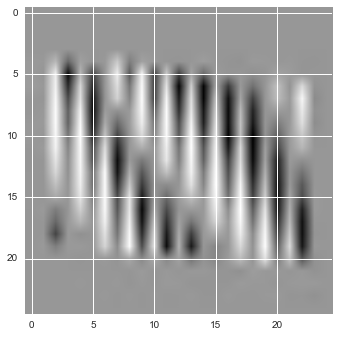

In [46]:
plt.imshow(Cd[1])

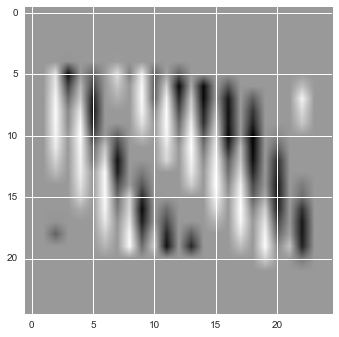

In [47]:
plt.imshow(pywt.threshold(Cd[1],0.3))

### (temp)Hough

In [48]:
from cv2 import HoughLines
from cv2 import HoughLinesP
from os import listdir
import cv2


In [49]:
asdf = listdir('d://nor/')

In [50]:
ima = cv2.imread('d://nor/'+asdf[1],1)

In [51]:
imb = cv2.Canny(ima,100,250)

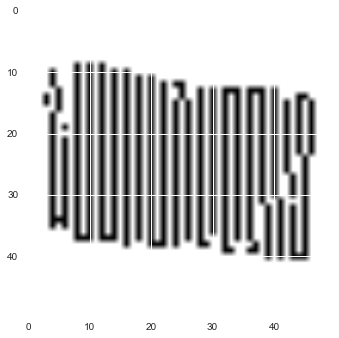

In [52]:
plt.imshow(imb)

### (temp)Harr-like feature

In [53]:
from cv2 import CascadeClassifier

### ensenble and randomforest

In [54]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
ens1 = RandomForestClassifier(n_estimators =  250 , max_depth= None,verbose=1)

ens2 = AdaBoostClassifier(SVC(kernel='rbf',gamma=0.005,C = 10.0),
                          algorithm="SAMME",
                          n_estimators=100,
                          learning_rate=0.01)


ens3  = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),
                         algorithm="SAMME",
                         n_estimators=100,
                          learning_rate=0.01)

ens1.fit(x_tr1, cat2lab(y_tr1))
ens2.fit(x_tr1, cat2lab(y_tr1))
ens3.fit(x_tr1, cat2lab(y_tr1))


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.1s finished


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.01, n_estimators=100, random_state=None)

In [56]:
ens1.score(x_te1,cat2lab(y_te1))


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished


0.72413793103448276

In [57]:
ens2.score(x_te1,cat2lab(y_te1))


0.62068965517241381

In [58]:
ens3.score(x_te1,cat2lab(y_te1))

0.41379310344827586

###  Todo 